# Introduction to Random Forests
© Explore Data Science Academy

## Learning Objectives
In this train we learn how to:

- Understand how random forests work;
- Understand how random forests differ from decision trees; and
- Understand how to use random forests to assess predictive variable importance.

## Outline

This train is structured as follows:

- Introduce random forests;
- Compare decision trees and random forests;
- Tune random forest hyperparameters; and
- Discuss predictive variable importance.

## Overfitting in Decision Trees

Overfitting turns out to be a general property of decision trees: it is very easy to go too deep in the tree, and thus fit details of the individual data points rather than the overall properties of the distributions they are drawn from. This issue can be addressed by using **Random Forests**.

## What is Ensemble Learning?

Ensemble learning in machine learning is the practice of combining multiple models to try and achieve higher overall model performance. In general, ensembles consist of multiple **heterogeneous or homogeneous** models trained on the same dataset. Each of these models is used to make predictions on the same input, then these predictions are aggregated across all models in some way (e.g. by taking the mean) to produce the final output. A commonly used example of an ensemble model is a `Random Forest`.

## What is a Random Forest?
A random forest is a powerful non-parametric algorithm and as mentioned is an example of an **ensemble** method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and the output is mean prediction of the individual trees*.

*For a regression problem. As we will see in the next sprint, classification problems use the mode of the ensembled trees as opposed to the mean.

## How do Random Forests Work?

### 1. Fitting data:

Keep in mind that _N_ refers to the number of observations (rows) in the training dataset, and _p_ the number of predictor variables (columns). The following is the typical algorithm for a Random Forest:

1. **Bootstrapping**: Drawing with replacement from the training dataset, randomly sample _N_ observations.
2. Use the _N_ observations to grow a random forest tree as follows:<br>
_<br>
At each node:<br>
i. Select a random subset, $m$, of predictor variables, where $m<\sqrt{p}$.<br>
ii. Pick the best variable/split-point among the selected predictor variables.<br>
iii. Divide data into two subsets based on the selected split.<br>
iv. Repeat until stopping criteria satisfied (e.g. minimum node sample size reached)._
<br>
3. Repeat until desired number of random forest trees is reached.

Since we draw randomly, with replacement, from the training data during the bootstrapping step it is possible that:
- Some data samples get resampled and thus reused when fitting different trees in the random forest;
- Some data samples don't get sampled at all and thus do not get used in fitting the random forest.

This means that the dataset each tree is grown on is slightly different, so random forests are less likely to overfit than decision trees.

### 2. Making Predictions:



Random forests combine multiple trees to make a prediction as follows:
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/random_forest.png">

The somewhat surprising result with such ensemble methods is that the sum can be greater than the parts: that is, a majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting! (An estimator is a tree.)

## Building a Random Forest Regression Model
Now that we have an understanding of how random forests work, let's implement one using scikit-learn.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

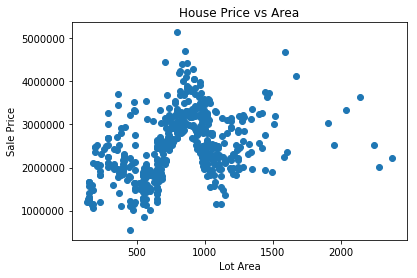

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/house_price_by_area.csv")

X = df["LotArea"] # independent variable 
y = df["SalePrice"] # dependent variable 

plt.scatter(X,y) # create scatter plot
plt.title("House Price vs Area")
plt.xlabel("Lot Area")
plt.ylabel("Sale Price")
plt.show()

### Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:,np.newaxis])

# Train test split
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=6)

### Training

This process of fitting a decision tree to our data can be done in Scikit-Learn with the ``RandomForestRegressor`` estimator:

As with decision trees, random forests also have hyperparameters, some of the more important ones include:

- **n_estimators**: The number of trees to include in forest
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node
- **max_depth**: The maximum depth of each forest tree (i.e. the number of nodes between root and leaf node).
- **random_state**: A number used to seed the random number generator. Ensures that we get the same tree each time we call model.fit() - _this particular hyperparameter is important in random forests since their training procedure is inherently random._
- **criterion**: The function to measure the quality of a split. The model uses the Mean Square Error (mse) by default.

To learn more about other RandomForestRegressor hyperparameters, run `help(RandomForestRegressor)` in a new cell.

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Testing
To evaluate the performance of our model, we can report the mean square error or plot predicted output vs expected output.

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
# Get predictions
y_pred = RF.predict(x_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 596644.9742378085


Actual vs Expected

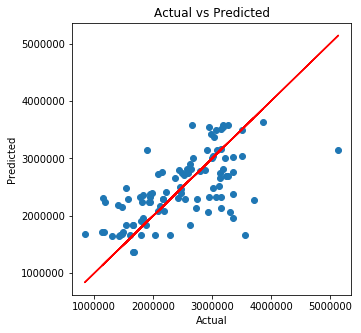

In [14]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

### Random forests vs. Other Models

In [23]:
# Fit regression decision tree model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
# Fit linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

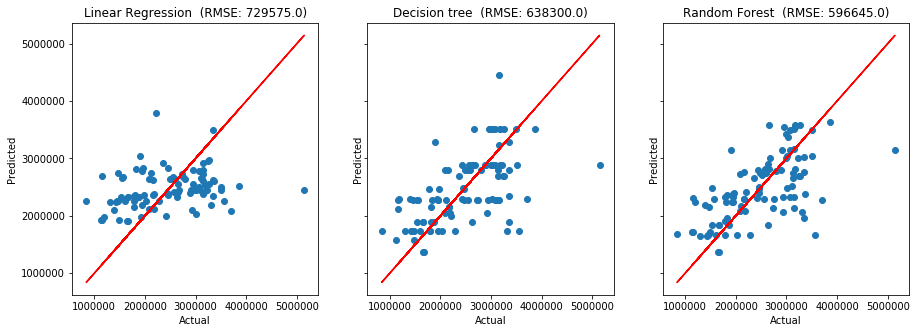

In [21]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [LR.predict(x_test), DT.predict(x_test), RF.predict(x_test)]
title = ['Linear Regression','Decision tree', 'Random Forest']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

### Tuning Model Hyperparameters 

In most cases, the default hyperpameter values do not offer the best model performance. In such cases, we have to tune model hyperparameters to yield the the best performing model.

Let's make some changes to the `n_estimators` parameter and compare the results:

#### Model Training

In [65]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [66]:
forest_1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2, n_jobs=None, oob_score=False,
                      random_state=23, verbose=0, warm_start=False)

In [67]:
forest_2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=23, verbose=0, warm_start=False)

In [68]:
forest_3.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=23, verbose=0, warm_start=False)

#### Model Evaluation

Actual vs Expected

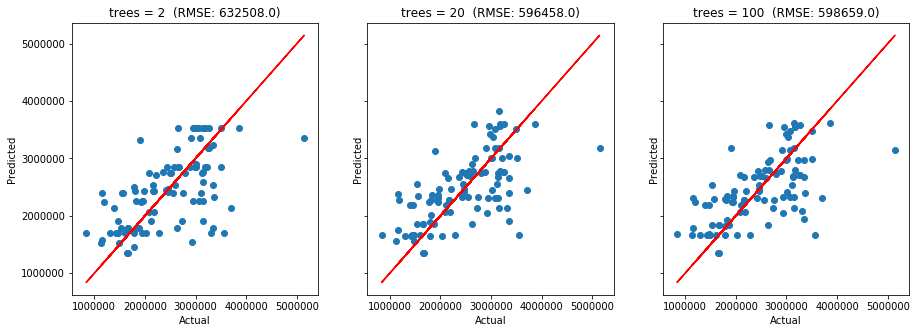

In [70]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

Looking at the RMSEs, the forest with 20 trees performed the best. Can you find the optimal parameters (including `max_depth` and `min_samples_leaf`)?

## Assessing Variable Importance

Knowing the **predictive power** (how different predictive variables affect the model's performance) can prove useful in cases where the dataset is large and high-dimensional since it allows us to establish which predictive variables we can discard without significantly affecting the model's performance. Additionally, models that are presented with fewer predictor variables tend to train faster.  

Unlike decision trees, random forests can be used to calculate a measure of predictor variable importance. One way to compute this measure in the regression setting is to use the training data that was left out when constructing the random forest. Then the variable importance for a given variable can be calculated by:

1. Keeping other variables the same;
2. Shuffling the value of the variable in question;
3. Calculating the percentage increase in MSE.  

This way, more important variables will have higher percentage increases in the MSE.

In Sklearn's `RandomForestRegressor`, we can easily obtain variable importances using:
    `model.feature_importances_`

## Advantages & Disadvantages of Random Forests

**Advantages**

* Less overfitting compared to a single tree (i.e. generalizes much better);
* Requires little data preparation - e.g. no real need to standardize features;
* Extremely flexible and usually have high prediction accuracy.

**Disadvantages**

* Complex and not very intuitive;
* Computation cost can be high if many trees used.

## Conclusion

That's the end of this train, you should now be familiar with:
- Random forests and how they compare to decision trees;
- Tuning Random forest hyperparameters;
- Assessing predictive variable importance.

## Appendix 
Links to additional resources to help with the understanding of concepts presented in the train: 

- [An indepth look into Random forests](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76)